In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("Number of features in dataframe : {}".format(len(df.columns)))

Number of features in dataframe : 5


In [5]:
print("Feature\t\tType\n", df.dtypes)

Feature		Type
 sepal length     float64
 sepal width     float64
 petal length    float64
 petal width     float64
 class            object
dtype: object


In [92]:
stats  = pd.DataFrame(np.zeros((7, 4)), index=["Min", "Max", "Mean", "Range", "SD", "Variance", "90th Percentile"], columns=df.columns[0:4:1])
stats.loc["Min"] = df.min()
stats.loc["Max"] = df.max()
stats.loc["Mean"] = df.mean()
stats.loc["Range"] = stats.loc["Max"]-stats.loc["Min"]
stats.loc["SD"] = df.std(ddof=0)
stats.loc["Variance"] = df.var(ddof=0)
stats.loc["90th Percentile"] = df.quantile(0.9)
print(stats)

                 sepal length   sepal width   petal length   petal width
Min                  4.300000      2.000000       1.000000      0.100000
Max                  7.900000      4.400000       6.900000      2.500000
Mean                 5.843333      3.054000       3.758667      1.198667
Range                3.600000      2.400000       5.900000      2.400000
SD                   0.825301      0.432147       1.758529      0.760613
Variance             0.681122      0.186751       3.092425      0.578532
90th Percentile      6.900000      3.610000       5.800000      2.200000


In [95]:
def generateStats(df):
    stats  = pd.DataFrame(np.zeros((7, 4)), index=["Min", "Max", "Mean", "Range", "SD", "Variance", "90th Percentile"], columns=df.columns[0:4:1])
    
    stats.loc["Max"] = df.max()
    stats.loc["Min"] = df.min()
    
    mean = pd.Series(np.zeros(4), index = df.columns[:4:])
    percentile = pd.Series(np.zeros(4), index = df.columns[:4:])
    
    for i in df.columns[:4:]:
        currCol = df[i].to_numpy()
        currCol = np.sort(currCol)
        for j in range(len(df.index)):
            mean[i] += df.iloc[j][i]
        percentile[i] = currCol[(int)((len(currCol)+1)*0.9)-1]
    
    mean /= len(df.index)
    
    stats.loc["Mean"] = mean
    stats.loc["90th Percentile"] = percentile
    stats.loc["Range"] = stats.loc["Max"]-stats.loc["Min"]
    
    variance = pd.Series(np.zeros(4), index = df.columns[:4:])
    
    for i in df.columns[:4:]:
        currMean = mean[i]
        for j in range(len(df.index)):
            variance[i] += ((df.iloc[j][i] - currMean)**2)
    
    variance /= len(df.index)
    
    stats.loc["Variance"] = variance
    stats.loc["SD"] = variance**0.5
    
    return stats

In [96]:
stats = generateStats(df)
print(stats)

                 sepal length   sepal width   petal length   petal width
Min                  4.300000      2.000000       1.000000      0.100000
Max                  7.900000      4.400000       6.900000      2.500000
Mean                 5.843333      3.054000       3.758667      1.198667
Range                3.600000      2.400000       5.900000      2.400000
SD                   0.825301      0.432147       1.758529      0.760613
Variance             0.681122      0.186751       3.092425      0.578532
90th Percentile      6.900000      3.600000       5.800000      2.200000


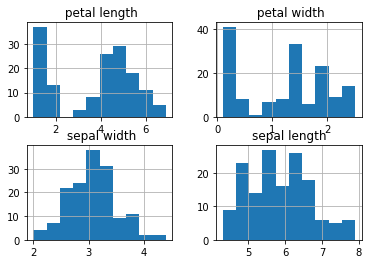

In [93]:
histogram = df.hist()

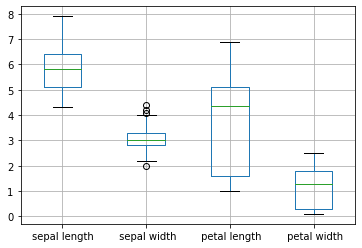

In [94]:
boxplot = df.boxplot()